In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [28]:
data = pd.read_csv('AnscombeQuartet.txt', sep='\t', header=None)

In [29]:
data

,0,1,2,3,4,5,6,7
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [30]:
header = pd.MultiIndex.from_product([['Dataset 1','Dataset 2', 'Dataset 3', 'Dataset 4'],
                                     ['x', 'y']],
                                    names=['dat','val'])

In [31]:
data.columns = header

In [32]:
data.index = [1,2,3,4,5,6,7,8,9,10,11]

In [33]:
data

dat Dataset 1        Dataset 2       Dataset 3        Dataset 4       
val         x      y         x     y         x      y         x      y
1        10.0   8.04      10.0  9.14      10.0   7.46       8.0   6.58
2         8.0   6.95       8.0  8.14       8.0   6.77       8.0   5.76
3        13.0   7.58      13.0  8.74      13.0  12.74       8.0   7.71
4         9.0   8.81       9.0  8.77       9.0   7.11       8.0   8.84
5        11.0   8.33      11.0  9.26      11.0   7.81       8.0   8.47
6        14.0   9.96      14.0  8.10      14.0   8.84       8.0   7.04
7         6.0   7.24       6.0  6.13       6.0   6.08       8.0   5.25
8         4.0   4.26       4.0  3.10       4.0   5.39      19.0  12.50
9        12.0  10.84      12.0  9.13      12.0   8.15       8.0   5.56
10        7.0   4.82       7.0  7.26       7.0   6.42       8.0   7.91
11        5.0   5.68       5.0  4.74       5.0   5.73       8.0   6.89

In [34]:
#data.to_latex('hola.tex')

In [35]:
data.columns = ['$x_1$','$y_1$','$x_2$','$y_2$','$x_3$','$y_3$','$x_4$','$y_4$']
data

,$x_1$,$y_1$,$x_2$,$y_2$,$x_3$,$y_3$,$x_4$,$y_4$
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
10,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


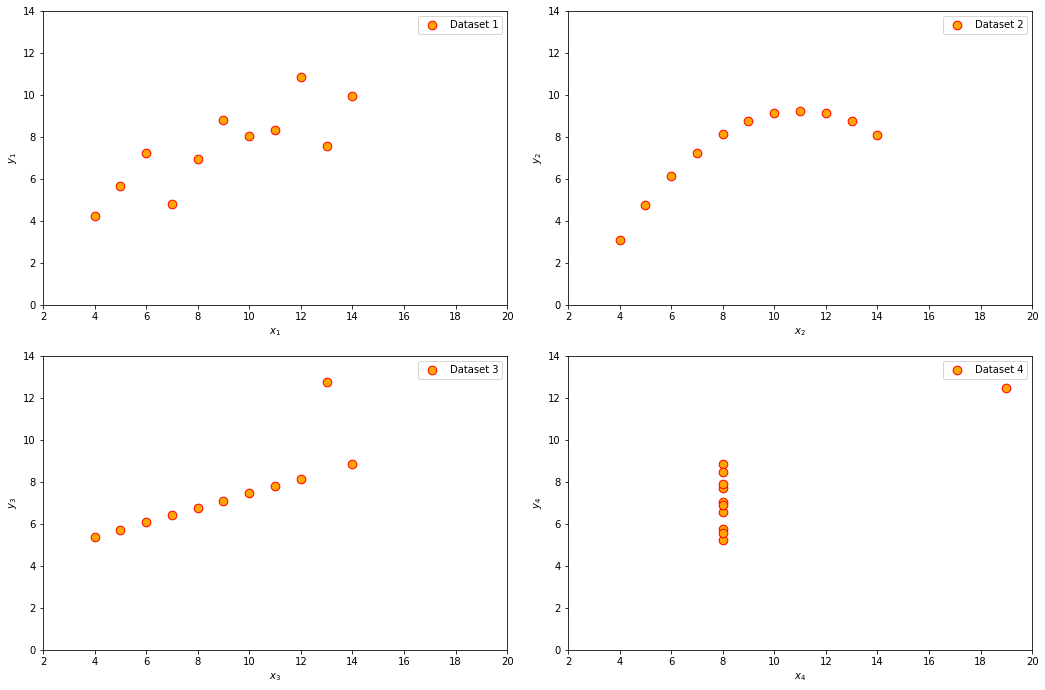

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.tight_layout(pad=3.0)

parametros = {'marker':'o', 'c':'orange', 'edgecolor':'red', 's':75, 'xlim':[2,20], 'ylim':[0,14]}
data.plot.scatter('$x_1$','$y_1$', label='Dataset 1', ax=axes[0,0], **parametros)
data.plot.scatter('$x_2$','$y_2$', label='Dataset 2', ax=axes[0,1], **parametros)
data.plot.scatter('$x_3$','$y_3$', label='Dataset 3', ax=axes[1,0], **parametros)
data.plot.scatter('$x_4$','$y_4$', label='Dataset 4', ax=axes[1,1], **parametros)

In [37]:
from sklearn.linear_model import LinearRegression

In [76]:
def regresionLineal(data, i):
    X = data.iloc[:, i].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, i+1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    X_pred =np.arange(0,21,1)
    X_pred.shape = (-1,1)
    Y_pred = linear_regressor.predict(X_pred)  # make predictions
    
    return X, Y, X_pred, Y_pred, linear_regressor

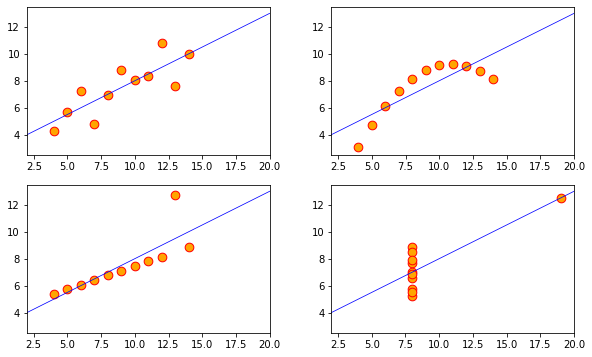

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
i = 0
c = []
for a in axes:
    for ax in a:
        X, Y, X_pred, Y_pred, coef = regresionLineal(data, i)
        c.append(coef.coef_)
        ax.scatter(X, Y, marker = 'o', c='orange', s=75, edgecolor='red')
        ax.plot(X_pred, Y_pred, color='blue', lw=0.75)
        ax.set_xlim(2,20)
        ax.set_aspect(aspect=1.0)
        i += 2

#### (A) Su punto de vista del artículo mencionado en el punto 1 
(particularmente de la sección 3)

Realmente cambió un poco mi perspectiva acerca de los gráficos, desde las primeras ocasiones que utilizabamos tal vez barras, o una gráfica de pastel en la primaria, solamente lo hacíamos sin pensar el por que de ello. A lo largo de la carrera, hemos ocupado las gráficas como una herramienta, pero me doy cuenta que no hemos aprovechado todas sus cualidades, pues lo utilizamos para comparar resultados, para analizar comportamientos despues de algun algoritmo aplicado, pero nunca vemos las gráficas como una manera de visualizar los datos, que realmente el visualizar los datos nos ayuda a darnos cuenta de cosas que a simple vista en un dataset no podemos percatarnos, un claro ejemplo es en la Tarea de $Speedup$ El valor atípico encontrado, era notorio pero si este fuése un poco menor, tal vez no nos daríamos cuenta y es aquí donde una gráfica como para este caso en particular, una boxplot podría ayudarnos en su totalidad a visualizar este tipo de datos y así poder aplicar mejores métodos.

 #### (B) Realizar los cálculos descritos en la transparencia 11 de la presentación Intro. a la Vis.
(página 11)

In [86]:
#Mediante Statistics podemos obtener los cálculos
import statistics as st

#Media
Mean = st.mean
MeanX = []
MeanY = []
for i in range(1,5):
    x = str(i)
    MeanX.append(Mean(data['$x_'+x+'$']))
    MeanY.append(Mean(data['$y_'+x+'$']))
for m in range(1,5):
    x = str(m)
    print('Media de x'+x+' =', MeanX[m-1])
for m in range(1,5):
    x = str(m)
    print('Media de y'+x+' =', MeanY[m-1])

Media de x1 = 9.0
Media de x2 = 9.0
Media de x3 = 9.0
Media de x4 = 9.0
Media de y1 = 7.500909090909091
Media de y2 = 7.500909090909091
Media de y3 = 7.5
Media de y4 = 7.500909090909091


In [90]:
#Varianza
Var = st.pvariance
VarX = []
VarY = []
for i in range(1,5):
    x = str(i)
    VarX.append(Var(data['$x_'+x+'$']))
    VarY.append(Var(data['$y_'+x+'$']))
for m in range(1,5):
    x = str(m)
    print('Varianza de x'+x+' =', VarX[m-1])
for m in range(1,5):
    x = str(m)
    print('Varianza de y'+x+' =', VarY[m-1])

Varianza de x1 = 10.0
Varianza de x2 = 10.0
Varianza de x3 = 10.0
Varianza de x4 = 10.0
Varianza de y1 = 3.752062809917356
Varianza de y2 = 3.752390082644628
Varianza de y3 = 3.747836363636364
Varianza de y4 = 3.7484082644628103


In [91]:
#Coeficientes

for m in range(1,5):
    x = str(m)
    print('Coeficiente de x'+x+', y'+x+' =', c[m-1])

Coeficiente de x1, y1 = [[0.50009091]]
Coeficiente de x2, y2 = [[0.5]]
Coeficiente de x3, y3 = [[0.49972727]]
Coeficiente de x4, y4 = [[0.49990909]]


In [92]:
#Mediante .corr() podemos obtener los coeficientes de relación directamente
data.corr()

,$x_1$,$y_1$,$x_2$,$y_2$,$x_3$,$y_3$,$x_4$,$y_4$
$x_1$,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
$y_1$,0.816421,1.000000,0.816421,0.750005,0.816421,0.468717,-0.529093,-0.489116
$x_2$,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
$y_2$,0.816237,0.750005,0.816237,1.000000,0.816237,0.587919,-0.718437,-0.478095
$x_3$,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
$y_3$,0.816287,0.468717,0.816287,0.587919,0.816287,1.000000,-0.344661,-0.155472
$x_4$,-0.500000,-0.529093,-0.500000,-0.718437,-0.500000,-0.344661,1.000000,0.816521
$y_4$,-0.314047,-0.489116,-0.314047,-0.478095,-0.314047,-0.155472,0.816521,1.000000


#### (C) "Retocar" los gráficos para que se muestre la información que es necesaria 
(etiquetas en los ejes, títulos, leyendas, tipo de marcadores, colores, etc).

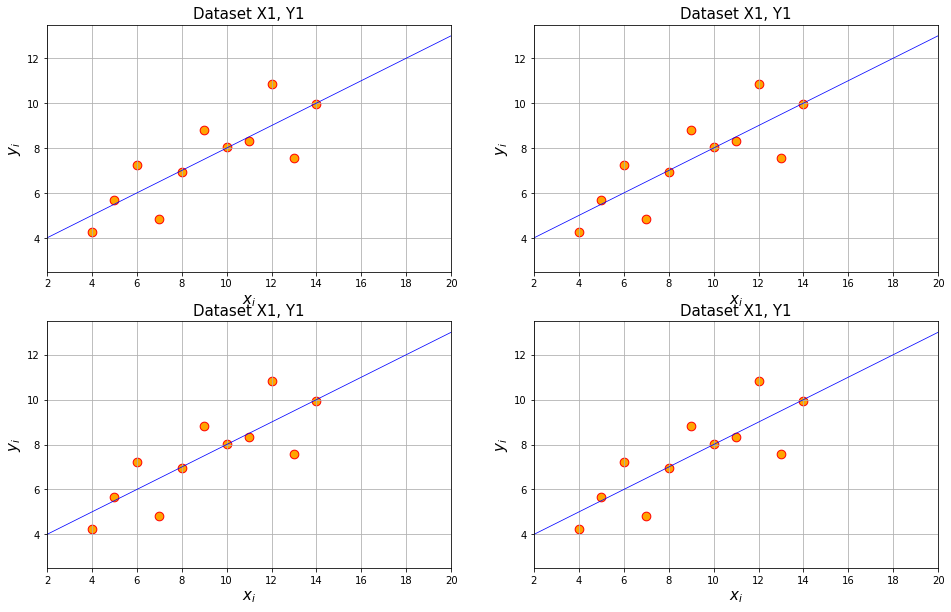

In [165]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
i = 0
for a in axes:
    for ax in a:
        X, Y, X_pred, Y_pred, coef = regresionLineal(data, i)
        ax.scatter(X, Y, marker = 'o', c='orange', s=75, edgecolor='red')
        ax.plot(X_pred, Y_pred, color='blue', lw=0.75)
        ax.grid()
        ax.set_title(f"Dataset X{i//2 + 1}, Y{i//2 + 1}", fontsize=15)
        ax.set_xlabel('$x_{i}$', fontsize=15)
        ax.set_xlim(2,20)
        ax.set_ylabel('$y_{i}$', fontsize=15)
        ax.set_aspect(aspect=1.0)